# The discrete-time fourier transform

based on:
    1. https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform
    2. https://docs.scipy.org/doc/scipy/tutorial/fft.html#fast-fourier-transforms

## intro

### The DTFT

$X_{2\pi}(\omega)=\sum_{n=\infty}^{\infty}x[n]*e^{-i\omega n}$

$\ x[n]$: real or complex sequence(signal)(n$\subset$Z)

$\omega$ has normalized units of [$\frac{radians}{sample}$] the periodicity is 2$\pi$
* The DTFT of x[n] produces a periodic function of a frquency variable $\omega$


* the DTFT starts with a discrete sequence in time and produces a periodic function in frequency

* normalized frequency is a ratio of a variable frequency (f) and a constant frequency associated with a system (such as a sampling rate, fs)

#### The inverse DTFT
x[n]=$\frac{1}{2\pi}\int_{2\pi} X_{2\pi}(\omega)e^{i\omega n}d\omega$

### The DFT

$X_{k}=\sum_{n=0}^{N-1}x_n*e^{-i\frac{2\pi}{N}kn}$

* basiclly $ X_k$ are the DTFT samples

* If the original sequence spans all the non-zero values of a function, its DTFT is continuous (and periodic), and the DFT provides discrete samples of one cycle. If the original sequence is one cycle of a periodic function, the DFT provides all the non-zero values of one DTFT cycle.

#### The inverse DFT
$ x_n=\frac{1}{N} \sum_{k=0}^{N-1} X_k*e^{i\frac{2\pi}{N}kn}$

### The DTFT and the DFT


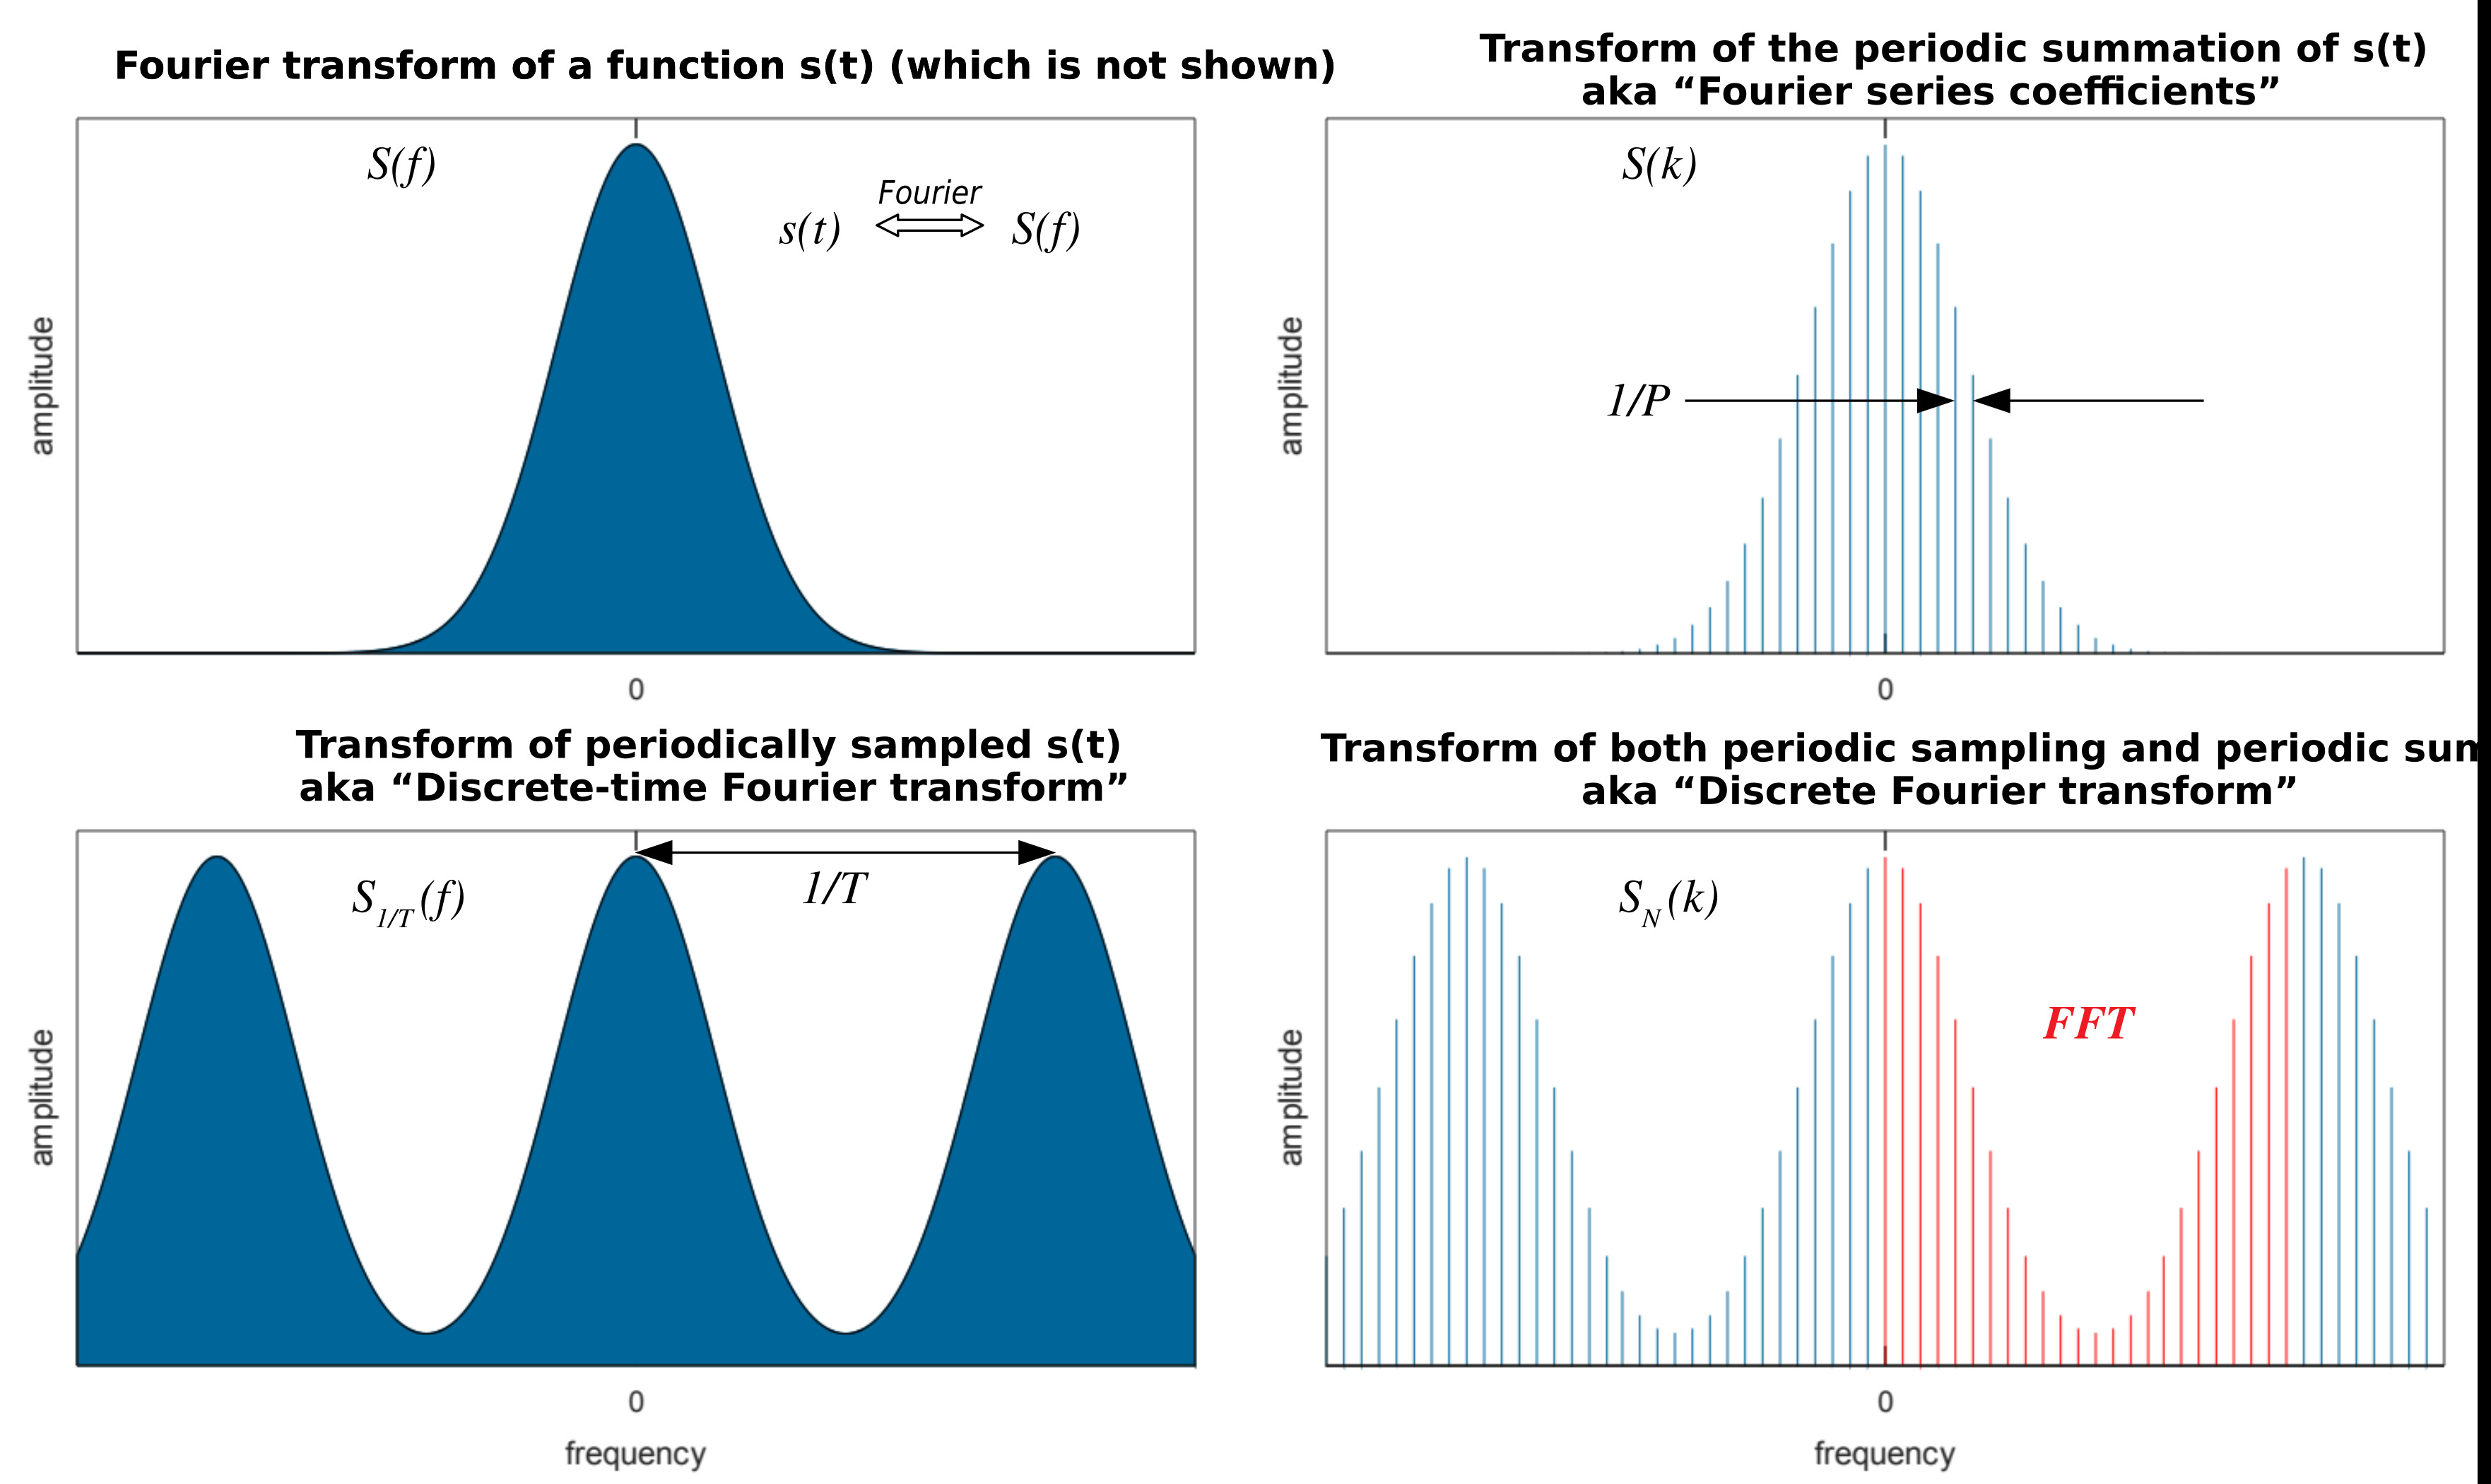

## Example:
will use sum of sines 
* sampled in fs=10[Hz]
* in an interval T=2

$ x[n]=cos(10*fs*N*2\pi)+cos(20*fs*N*2\pi)$

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift


### present signal

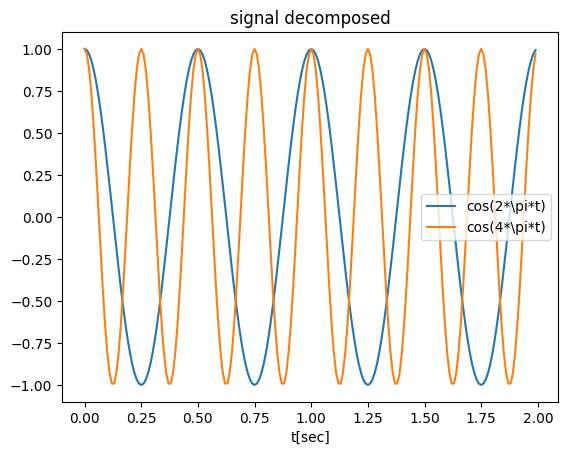

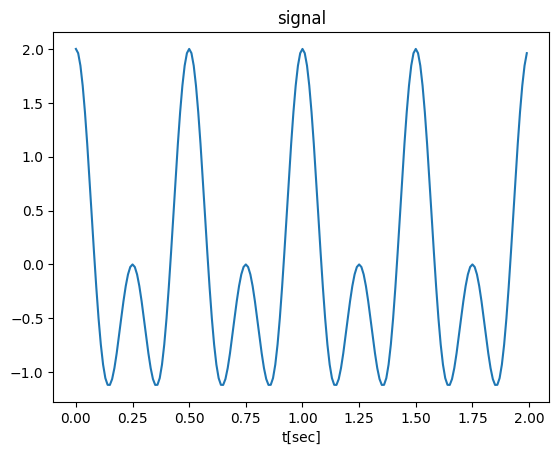

In [2]:
# present signal

## time interval
T=2

## sampling frequency
fs=100

## Number of samples
N=int(T*fs) 

## time vector
t=np.linspace(start=0,stop=T-1/fs,num=N)

## signal
f1,f2=2,4 #[Hz] or [cycle/sec]
w1,w2=f1*2*np.pi,f2*2*np.pi #[rad/sec]

x1=np.cos(t*w1)
x2=np.cos(t*w2)
x_signal=x1+x2

## present signal parts
plt.plot(t,x1,t,x2)
plt.title('signal decomposed')
plt.xlabel('t[sec]')
plt.legend(['cos(2*\pi*t)','cos(4*\pi*t)'])
plt.show()

## present composed signal 
plt.plot(t,x_signal)
plt.title('signal')
plt.xlabel('t[sec]')
plt.show()

### analize signal with DFT

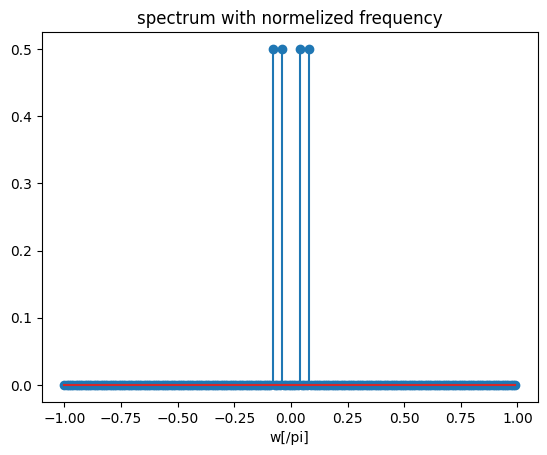

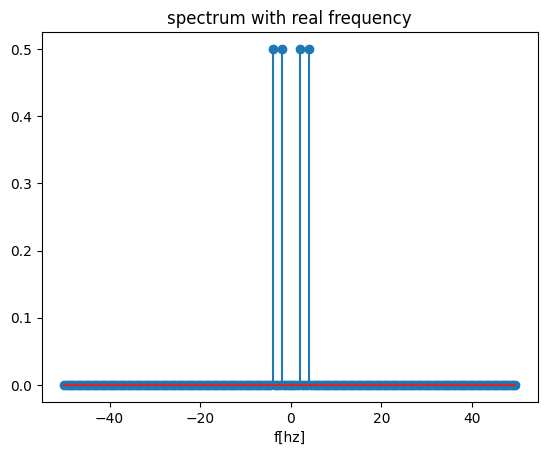

In [3]:
# analize the signal

## the frequency vector
n=len(x_signal)

### normelized frequency
d=1/(2*np.pi)
fn=fftfreq(n,d)/np.pi

### real frequency
d=1/fs
f=fftfreq(n,d)
## the DFT 
X=fft(x_signal,norm="forward")

## present spectrums
plt.stem(fn,X.real)
plt.title('spectrum with normelized frequency')
plt.xlabel('w[/pi]')
# plt.xlim([0,])
plt.show()

plt.stem(f,X.real)
plt.title('spectrum with real frequency')
plt.xlabel('f[hz]')
# plt.xlim([0,5])
plt.show()


### reconstruct the signal with IDFT

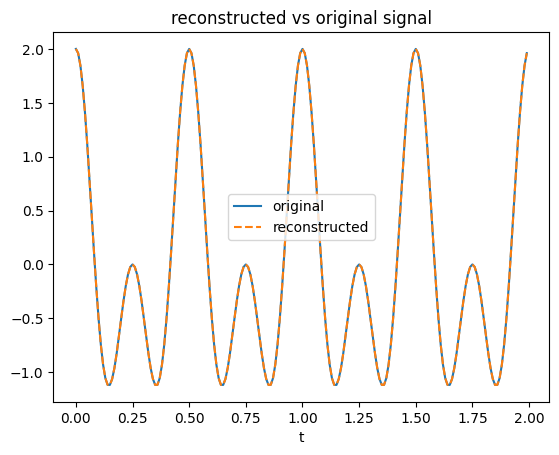

In [4]:
# decompose the signal

## the IDFT 
x_reconstruct=ifft(X,norm="forward")

## present spectrums
plt.plot(t,x_signal,t,x_reconstruct.real,'--')
plt.title('reconstructed vs original signal')
plt.xlabel('t')
plt.legend(['original','reconstructed'])
# plt.xlim([0,])
plt.show()



# Appendix

## cos and time

np.cos(x)
* x in radians

in the case of a series of cosine:

* for fs=10 [hz]: t=[0.1,0.2,0.3,0.4..]
* if the cosine frequency is f1=2[hz]<-->w1=f1*2*np.pi
* for t=0-->cos(0)=1
* for t=0.5-->cos(pi/2)=0
* for t=1-->cos(pi)=-1
the cosine arguments should be:
w[0]=0,w[5]=pi/2...

w=[t*w1]


## fft

scipy.fft.fft(x,norm)
* **x**-input array
* **norm**-normelization method{"beckward","ortho","forward"} 
1. backward-->no normalization, only in the ifft will bw factor of 1/n
2. forward-->exactly the opposite of backward
3. ortho-->both directions factored by  $\frac{1}{\sqrt{n}}$

## fftfreq

scipy.fft.fftfreq(n,d)

* **n**-window length
* **d**-sample spacing
* **f**-frequencys returned

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even


f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

if d(( is in seconds the frequency unit is in $\frac{cycle}{seconds}$

(dn/1)/(n/2)=2/fs<-->2d=2/fs--->d=1/fs

if (n/2)/(d*n)=pi the frequency unit is in $\frac{2\pi}{fs}$ 



## Ifft

scipy.fft.ifft(x,norm)

* **x**-input signal
* **norm**-normelization method{"beckward","ortho","forward"} 
1. backward-->no normalization, only in the ifft will bw factor of 1/n
2. forward-->exactly the opposite of backward
3. ortho-->both directions factored by  $\frac{1}{\sqrt{n}}$

The input should be ordered in the same way as is returned by fft, i.e.,

* x[0] should contain the zero frequency term,
* x[1:n//2] should contain the positive-frequency terms,
* x[n//2 + 1:] should contain the negative-frequency terms, in increasing order starting from the most negative frequency.